In [33]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import pandas as pd

In [17]:
df = pd.read_csv('docentes.csv', error_bad_lines=False, sep=';', parse_dates=['admissao'])
df.head()

,siape,nome,sexo,formacao,categoria,regime_trabalho,tipo_regime_juridico,situacao_servidor,cargo,classe_funcional,unidade,admissao
0,1281009,ABEL LASSALLE CASANAVE,MASCULINO,DOUTORADO,DOCENTE,Dedicação exclusiva,Estatutário,Ativo Permanente,PROFESSOR DO MAGISTERIO SUPERIOR,Classe E - Titular ...,DEPARTAMENTO DE FILOSOFIA/FFCH,2010-12-11
1,283167,ABEL RIBEIRO DE JESUS,MASCULINO,DOUTORADO,DOCENTE,Dedicação exclusiva,Estatutário,Ativo Permanente,PROFESSOR DO MAGISTERIO SUPERIOR,Classe D - Associado ...,DEPARTAMENTO DE ENGENHARIA MECÂNICA/ENG,1973-10-03
2,1732621,ACACIA FERNANDES LACERDA DE CARVALHO,FEMININO,DOUTORADO,DOCENTE,Dedicação exclusiva,Estatutário,Ativo Permanente,PROFESSOR DO MAGISTERIO SUPERIOR,Classe D - Associado ...,DEPARTAMENTO DE BIOLOGIA GERAL/BIO,2009-10-19
3,1168175,ACYLENE MARIA CABRAL FERREIRA,FEMININO,DOUTORADO,DOCENTE,Dedicação exclusiva,Estatutário,Ativo Permanente,PROFESSOR DO MAGISTERIO SUPERIOR,Classe E - Titular ...,PROGRAMA DE PÓS-GRADUAÇÃO EM FILOSOFIA (PPGF),2000-01-21
4,285092,ADELAIDE MARIA VIEIRA VIVEIROS,FEMININO,DOUTORADO,DOCENTE,Dedicação exclusiva,Estatutário,Ativo Permanente,PROFESSOR DO MAGISTERIO SUPERIOR,Classe E - Titular ...,DEPARTAMENTO QUIMICA GERAL E INORGANICA/QUI,1978-04-20


In [18]:
#verificando se tem algum valor nulo
df.isnull().sum()

siape                   0
nome                    0
sexo                    0
formacao                0
categoria               0
regime_trabalho         0
tipo_regime_juridico    0
situacao_servidor       0
cargo                   0
classe_funcional        0
unidade                 0
admissao                0
dtype: int64

In [28]:
df['ano_admissao'] = df.admissao.dt.year
df.head()

,siape,nome,sexo,formacao,categoria,regime_trabalho,tipo_regime_juridico,situacao_servidor,cargo,classe_funcional,unidade,admissao,ano_admissao
0,1281009,ABEL LASSALLE CASANAVE,MASCULINO,DOUTORADO,DOCENTE,Dedicação exclusiva,Estatutário,Ativo Permanente,PROFESSOR DO MAGISTERIO SUPERIOR,Classe E - Titular ...,DEPARTAMENTO DE FILOSOFIA/FFCH,2010-12-11,2010
1,283167,ABEL RIBEIRO DE JESUS,MASCULINO,DOUTORADO,DOCENTE,Dedicação exclusiva,Estatutário,Ativo Permanente,PROFESSOR DO MAGISTERIO SUPERIOR,Classe D - Associado ...,DEPARTAMENTO DE ENGENHARIA MECÂNICA/ENG,1973-10-03,1973
2,1732621,ACACIA FERNANDES LACERDA DE CARVALHO,FEMININO,DOUTORADO,DOCENTE,Dedicação exclusiva,Estatutário,Ativo Permanente,PROFESSOR DO MAGISTERIO SUPERIOR,Classe D - Associado ...,DEPARTAMENTO DE BIOLOGIA GERAL/BIO,2009-10-19,2009
3,1168175,ACYLENE MARIA CABRAL FERREIRA,FEMININO,DOUTORADO,DOCENTE,Dedicação exclusiva,Estatutário,Ativo Permanente,PROFESSOR DO MAGISTERIO SUPERIOR,Classe E - Titular ...,PROGRAMA DE PÓS-GRADUAÇÃO EM FILOSOFIA (PPGF),2000-01-21,2000
4,285092,ADELAIDE MARIA VIEIRA VIVEIROS,FEMININO,DOUTORADO,DOCENTE,Dedicação exclusiva,Estatutário,Ativo Permanente,PROFESSOR DO MAGISTERIO SUPERIOR,Classe E - Titular ...,DEPARTAMENTO QUIMICA GERAL E INORGANICA/QUI,1978-04-20,1978


In [100]:
#verificando se os nomes so ocorrem uma vez, ou seja, não há nomes repetidos
df.nome.is_unique

True

In [30]:
df.groupby(['ano_admissao', 'formacao']).size().sort_values(ascending=False)

ano_admissao  formacao    
2009          DOUTORADO       213
2011          DOUTORADO       176
2010          DOUTORADO       142
2017          DOUTORADO       129
2015          DOUTORADO       113
                             ... 
2012          DESCONHECIDA      1
1984          MESTRADO          1
1986          MESTRADO          1
2009          GRADUAÇÃO         1
1970          DOUTORADO         1
Length: 123, dtype: int64

#### Formação dos docentes

In [90]:
# Para ver a formação dos professores
df.groupby(['formacao']).size().sort_values(ascending=False)

formacao
DOUTORADO         2052
MESTRADO           381
ESPECIALIZAÇÃO      53
DESCONHECIDA        35
GRADUAÇÃO           12
dtype: int64

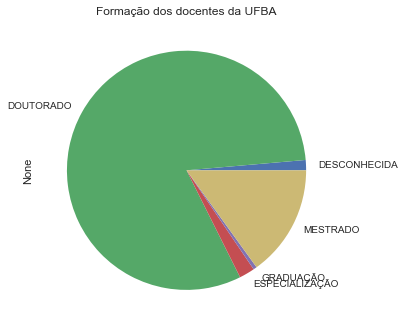

In [94]:
df.groupby(['formacao']).size().plot.pie(title='Formação dos docentes da UFBA');

In [95]:
df.groupby(['ano_admissao', 'formacao']).size().sort_values(ascending=False)

ano_admissao  formacao    
2009          DOUTORADO       213
2011          DOUTORADO       176
2010          DOUTORADO       142
2017          DOUTORADO       129
2015          DOUTORADO       113
                             ... 
2012          DESCONHECIDA      1
1984          MESTRADO          1
1986          MESTRADO          1
2009          GRADUAÇÃO         1
1970          DOUTORADO         1
Length: 123, dtype: int64

#### Análise ano da admissão

In [96]:
df.groupby(['ano_admissao']).size().sort_values(ascending=False)

ano_admissao
2009    238
2011    224
2017    174
2010    164
2016    146
2015    134
2019    133
2013    127
2014    104
2018    101
2012     97
1992     96
2006     76
2002     63
1994     55
1997     55
2004     54
2007     53
1980     45
1990     41
1993     36
2008     34
2005     28
1995     26
1996     24
1978     18
1979     18
1998     17
2000     17
2003     17
1982     17
1985     16
1987     14
1986     11
1991     11
1984      8
1999      8
1977      8
2001      6
1975      5
1974      5
1983      4
1976      2
1973      1
1981      1
1970      1
dtype: int64

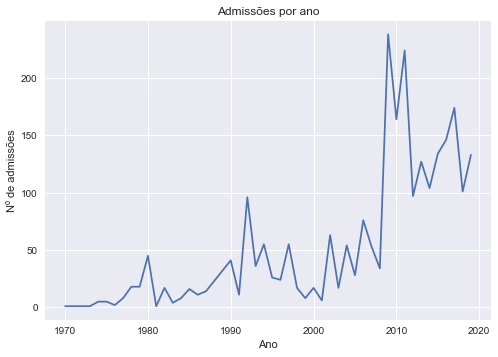

In [101]:
df.groupby(['ano_admissao']).size().plot(title='Admissões por ano')
plt.xlabel('Ano')
plt.ylabel('Nº de admissões');

## Doutores 

In [40]:
filtro_doutores = df.formacao == 'DOUTORADO'
doutores = df.loc[filtro_doutores]
doutores.head()

,siape,nome,sexo,formacao,categoria,regime_trabalho,tipo_regime_juridico,situacao_servidor,cargo,classe_funcional,unidade,admissao,ano_admissao
940,2921839,GISELLE ALVES DA SILVA TEIXEIRA,FEMININO,DOUTORADO,DOCENTE,Dedicação exclusiva,Estatutário,Ativo Permanente,PROFESSOR DO MAGISTERIO SUPERIOR,Classe C - Adjunto ...,ESCOLA DE ENFERMAGEM,2016-07-15,2016
911,1740819,GERVASIO FERREIRA DOS SANTOS,MASCULINO,DOUTORADO,DOCENTE,Dedicação exclusiva,Estatutário,Ativo Permanente,PROFESSOR DO MAGISTERIO SUPERIOR,Classe D - Associado ...,DEPARTAMENTO DE ECONOMIA/FCE,2009-01-12,2009
2157,1914446,ROBERTA COSTA DIAS,FEMININO,DOUTORADO,DOCENTE,Dedicação exclusiva,Estatutário,Ativo Permanente,PROFESSOR DO MAGISTERIO SUPERIOR,Classe C - Adjunto ...,ESCOLA DE MEDICINA VETERINÁRIA E ZOOTECNIA,2012-02-02,2012
2239,2403679,SAMILLY EVANGELISTA SOUZA,FEMININO,DOUTORADO,DOCENTE,Dedicação exclusiva,Estatutário,Ativo Permanente,PROFESSOR DO MAGISTERIO SUPERIOR,Classe A - Adjunto A ...,DEP DE CLINICA ODONTOLOGICA/ODON,2017-06-29,2017
1005,2243104,HILDENISE FERREIRA NOVO,FEMININO,DOUTORADO,DOCENTE,Dedicação exclusiva,Estatutário,Ativo Permanente,PROFESSOR DO MAGISTERIO SUPERIOR,Classe C - Adjunto ...,INSTITUTO DE CIÊNCIA DA INFORMAÇÃO,2003-02-04,2003
161,1886444,ANA RODRIGUES CAVALCANTI ALVES,FEMININO,DOUTORADO,DOCENTE,Dedicação exclusiva,Estatutário,Ativo Permanente,PROFESSOR DO MAGISTERIO SUPERIOR,Classe A - Adjunto A ...,FACULDADE DE FILOSOFIA E CIÊNCIAS HUMANAS,2019-08-21,2019
1050,2724542,ISABEL CRISTINA RIGOLI,FEMININO,DOUTORADO,DOCENTE,Dedicação exclusiva,Estatutário,Ativo Permanente,PROFESSOR DO MAGISTERIO SUPERIOR,Classe D - Associado ...,DEPARTAMENTO DE FISICO-QUIMICA/QUI,2010-09-30,2010
124,2497156,ANA CLAUDIA REBOUCAS RAMALHO LACERDA,FEMININO,DOUTORADO,DOCENTE,40 horas semanais,Estatutário,Ativo Permanente,PROFESSOR DO MAGISTERIO SUPERIOR,Classe D - Associado ...,DEPARTAMENTO DE MEDICINA INTERNA E APOIO AO DI...,2006-02-21,2006
1861,287249,MONCLAR EDUARDO GOES DE LIMA VALVERDE,MASCULINO,DOUTORADO,DOCENTE,Dedicação exclusiva,Estatutário,Ativo Permanente,PROFESSOR DO MAGISTERIO SUPERIOR,Classe E - Titular ...,"INSTITUTO DE HUMANIDADES, ARTES E CIÊNCIAS PRO...",1990-02-01,1990
1421,3365799,LIVIA MARIA NATALIA DE SOUZA SANTOS,FEMININO,DOUTORADO,DOCENTE,Dedicação exclusiva,Estatutário,Ativo Permanente,PROFESSOR DO MAGISTERIO SUPERIOR,Classe D - Associado ...,DEPTO FUNDAMENTOS P/ESTUDO DAS LETRAS,2010-04-08,2010


In [42]:
#vendo a quantidade de doutores por unidade
doutores.groupby(['unidade']).size().sort_values(ascending=False)

unidade
INSTITUTO MULTIDISCIPLINAR EM SAÚDE                                   88
INSTITUTO DE HUMANIDADES, ARTES E CIÊNCIAS PROFESSOR MILTON SANTOS    61
DEPARTAMENTO DE MATEMATICA/MAT                                        61
DEP DE ESTUDOS ORGANIZACIONAIS/ADM                                    54
DEPTO LETRAS VERNÁCULAS/LET                                           48
                                                                      ..
COORDENAÇÃO ACADÊMICA/IPS                                              1
PRO-REITORIA DE PLANEJAMENTO E ORÇAMENTO                               1
INSTITUTO DE CIÊNCIAS DA SAÚDE                                         1
PROGRAMA DE PÓS-GRADUAÇÃO EM ARTES VISUAIS (PPGAV)                     1
PROGRAMA DE PÓS-GRADUAÇÃO EM ARTES CÊNICAS (PPGAC)                     1
Length: 156, dtype: int64

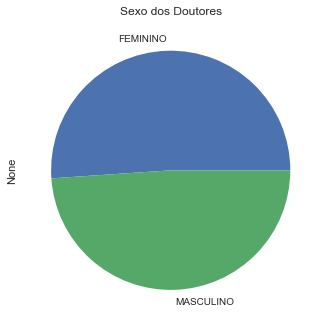

In [57]:
doutores.groupby(['sexo']).size().plot.pie(title='Sexo dos Doutores');

In [50]:
doutores.groupby(['regime_trabalho']).size().sort_values(ascending=False)

regime_trabalho
Dedicação exclusiva               1759
40 horas semanais                  175
20 horas semanais                  118
dtype: int64

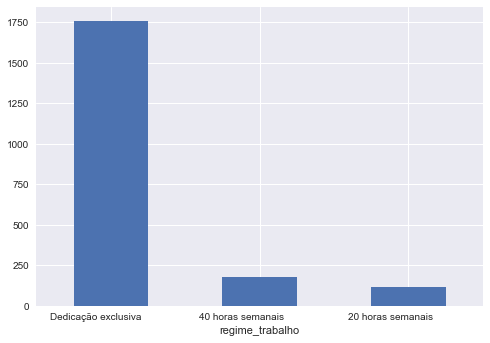

In [52]:
doutores.groupby(['regime_trabalho']).size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation='horizontal');

Text(0, 0.5, 'Quantidade')

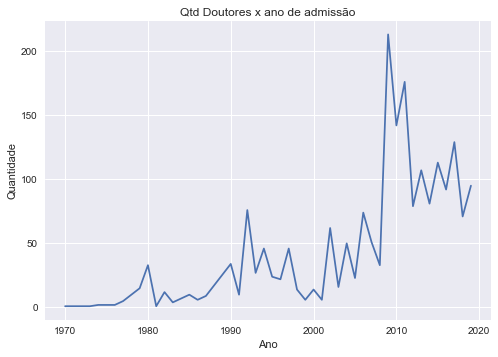

In [62]:
doutores.groupby(['ano_admissao']).size().plot(title='Qtd Doutores x ano de admissão')
plt.xlabel('Ano')
plt.ylabel('Quantidade')

In [66]:
doutores.groupby(['classe_funcional']).size().sort_values(ascending=False)

classe_funcional
Classe D - Associado                                                                                    802
Classe C - Adjunto                                                                                      705
Classe A - Adjunto A                                                                                    320
Classe E - Titular                                                                                      196
Classe B - Assistente                                                                                    19
DIV                                                                                                       5
Classe U - Titular                                                                                        3
Classe A - Assistente A                                                                                   1
Classe A - Auxiliar                                                                                       1
dtype: int6

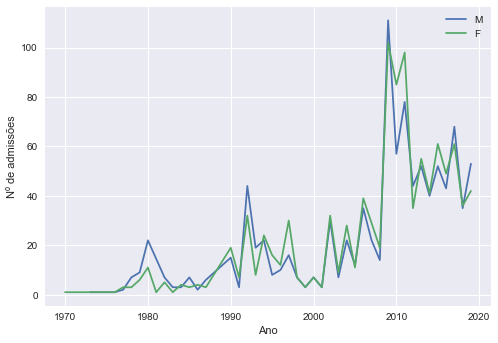

In [103]:
filtro1= doutores.sexo == 'MASCULINO'
dout_m = doutores.loc[filtro1]
filtro2= doutores.sexo == 'FEMININO'
dout_f = doutores.loc[filtro2]
dout_m.groupby(['ano_admissao']).size().plot()
dout_f.groupby(['ano_admissao']).size().plot()
plt.xlabel('Ano')
plt.ylabel('Nº de admissões')
plt.legend(['M', 'F'], loc='best');



#doutores.groupby(['ano_admissao', 'sexo']).size()

In [63]:
#df.groupby(['formacao', 'sexo']).size().sort_values(ascending=False).plot.bar()
doutores.groupby('categoria').nunique()


,siape,nome,sexo,formacao,regime_trabalho,tipo_regime_juridico,situacao_servidor,cargo,classe_funcional,unidade,admissao,ano_admissao
categoria,,,,,,,,,,,,
DOCENTE,2052,2052,2,1,3,1,1,3,9,156,1317,46


## Mestres

In [91]:
filtro_mestres = df.formacao == 'MESTRADO'
mestres = df.loc[filtro_mestres]
mestres

,siape,nome,sexo,formacao,categoria,regime_trabalho,tipo_regime_juridico,situacao_servidor,cargo,classe_funcional,unidade,admissao,ano_admissao
13,2927301,ADRIANA BRASIL VIEIRA WYZYKOWSKI,FEMININO,MESTRADO,DOCENTE,40 horas semanais,Estatutário,Ativo Permanente,PROFESSOR DO MAGISTERIO SUPERIOR,Classe A - Assistente A ...,DEPARTAMENTO DE DIREITO PRIVADO/DIR,2016-05-12,2016
20,2270918,ADRIANA MARIA AURELIANO DA SILVA,FEMININO,MESTRADO,DOCENTE,40 horas semanais,Estatutário,Ativo Permanente,PROFESSOR DO MAGISTERIO SUPERIOR,Classe A - Assistente A ...,DEPARTAMENTO DE DIREITO PRIVADO/DIR,2016-11-01,2016
35,2654476,ADSON ROBERTO SANTOS NEVES,MASCULINO,MESTRADO,DOCENTE,20 horas semanais,Estatutário,Ativo Permanente,PROFESSOR DO MAGISTERIO SUPERIOR,Classe B - Assistente ...,DEPARTAMENTO DE ANESTESIOLOGIA E CIRURGIA/FMB,2011-07-26,2011
39,1085550,AILTON DE SOUSA SILVEIRA LIMA JUNIOR,MASCULINO,MESTRADO,DOCENTE,Dedicação exclusiva,Estatutário,Ativo Permanente,PROFESSOR DO MAGISTERIO SUPERIOR,Classe C - Adjunto ...,DEPARTAMENTO DE ENGENHARIA MECÂNICA/ENG,1994-09-29,1994
40,2766817,AKEMI TAHARA,FEMININO,MESTRADO,DOCENTE,40 horas semanais,Estatutário,Ativo Permanente,PROFESSOR DO MAGISTERIO SUPERIOR,Classe B - Assistente ...,FACULDADE DE ARQUITETURA,2013-05-13,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,3413743,WAGNER LACERDA DE OLIVEIRA,MASCULINO,MESTRADO,DOCENTE,Dedicação exclusiva,Estatutário,Ativo Permanente,PROFESSOR DO MAGISTERIO SUPERIOR,Classe B - Assistente ...,DEPTO EXPRESSÃO GRAFICA E TRIDIMENSIONAL,2013-09-10,2013
2523,3049478,YNAE ALMEIDA FERREIRA SANTOS,FEMININO,MESTRADO,DOCENTE,Dedicação exclusiva,Estatutário,Ativo Permanente,PROFESSOR DO MAGISTERIO SUPERIOR,Classe A - Assistente A ...,DEP CIÊNCIA TECNOLOGIA DE MATERIAIS/ENG,2018-06-06,2018
2526,2718348,YURI GUERRIERI PEREIRA,MASCULINO,MESTRADO,DOCENTE,Dedicação exclusiva,Estatutário,Ativo Permanente,PROFESSOR DO MAGISTERIO SUPERIOR,Classe B - Assistente ...,DEPARTAMENTO DE ENGENHARIA QUÍMICA/ENG,2009-11-27,2009
2529,1754233,ZAIRA NASCIMENTO DA FRANCA,FEMININO,MESTRADO,DOCENTE,Dedicação exclusiva,Estatutário,Ativo Permanente,PROFESSOR DO MAGISTERIO SUPERIOR,Classe C - Adjunto ...,DEPTO LETRAS GERMANICAS/LET,2010-01-28,2010


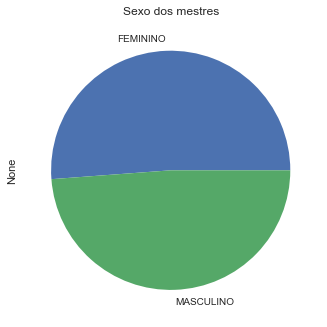

In [65]:
mestres.groupby(['sexo']).size().plot.pie(title='Sexo dos mestres');